<a href="https://colab.research.google.com/github/rostom1999/IA_project/blob/main/case2_chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_heads = 16
num_flips = 20
prob_head = 0.5
prob = stats.binom_test(num_heads, num_flips, prob_head)
#stats.binom_test: nrml elle renvoit 18 chiffres
print(f"Probability of observing more than 16 heads or 16 tails is {prob:.17f}")

Probability of observing more than 16 heads or 16 tails is 0.01181793212890625


In [ ]:
prob_16_heads = stats.binom.pmf(num_heads, num_flips, prob_head)
print(f"The probability of seeing exactly{num_heads} of {num_flips} heads is {prob_16_heads}")


The probability of seeing exactly16 of 20 heads is 0.004620552062988271


In [ ]:
# Calculating probability for having 4 or 16 heads
probabilities = stats.binom.pmf([4, 16], num_flips, prob_head)
print("probabilities: ",probabilities)
assert probabilities.tolist() == [prob_16_heads] * 2

probabilities:  [0.00462055 0.00462055]


In [ ]:
# All possibilities between 0 and 20
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)
total_prob=np.sum(probabilities)
print(f"Total sum of probabilities equals {total_prob:.14f}")

Total sum of probabilities equals 1.00000000000000


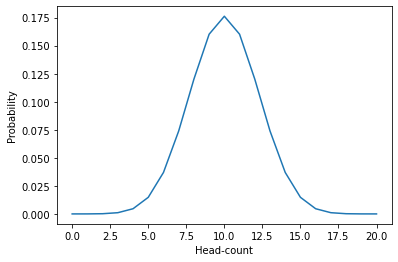

In [ ]:
plt.plot(interval_all_counts, probabilities)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

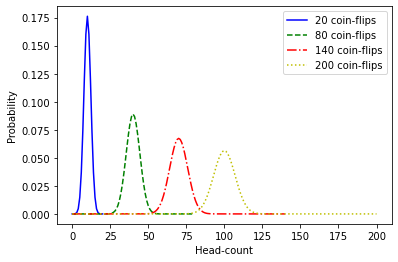

In [ ]:
flip_counts = [20, 80, 140, 200]
linestyles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'y']
for num_flips, linestyle, color in zip(flip_counts, linestyles, colors):
    
    x_values = range(num_flips + 1)
    y_values = stats.binom.pmf(x_values, num_flips, 0.5)
    plt.plot(x_values, y_values, linestyle=linestyle,color=color,label=f'{num_flips} coin-flips')
    
plt.legend()
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

* Trying to find the best center

In [ ]:
import numpy as np
measurements = np.array([80, 77, 73, 61, 74, 79, 81])

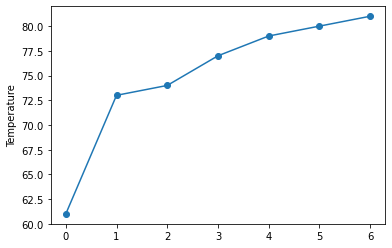

In [ ]:
measurements.sort()
number_of_days = measurements.size
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.ylabel('Temperature')
plt.show()

In [ ]:
difference = measurements.max() - measurements.min()
midpoint = measurements.min() + difference / 2
assert midpoint == (measurements.max() + measurements.min()) / 2
print(f"The midpoint temperature is {midpoint} degrees")

The midpoint temperature is 71.0 degrees


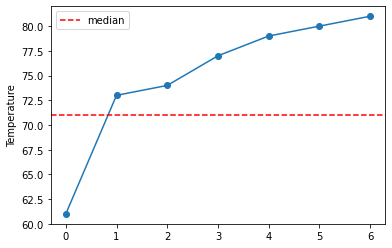

In [ ]:
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='r', linestyle='--',label='median')
plt.ylabel('Temperature')
plt.legend()
plt.show()

The median temperature is 77 degrees


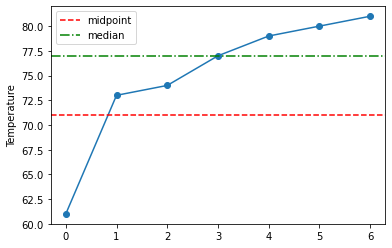

In [ ]:
median = measurements[3]
print(f"The median temperature is {median} degrees")
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='r', linestyle='--', label='midpoint')
plt.axhline(median, color='g', linestyle='-.', label='median')
plt.legend()
plt.ylabel('Temperature')
plt.show()

* The median is too far from the first point 

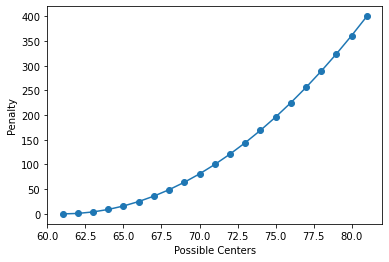

In [ ]:
def squared_distance(value1, value2):
    return (value1 - value2) ** 2
possible_centers = range(measurements.min(), measurements.max() + 1)
penalties = [squared_distance(center, 61) for center in possible_centers]
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.show()

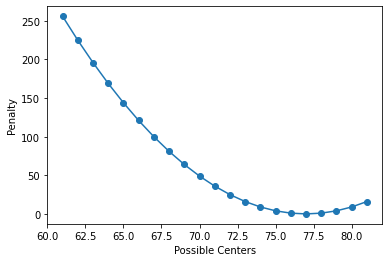

In [ ]:
def squared_distance(value1, value2):
    return (value1 - value2) ** 2
possible_centers = range(measurements.min(), measurements.max() + 1)
penalties = [squared_distance(center, 77) for center in possible_centers]
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.show()

* Calculating distance for all points

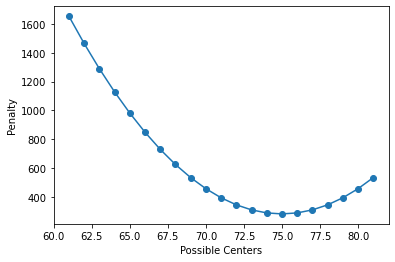

In [ ]:
def sum_of_squared_distances(value, measurements):
    return sum(squared_distance(value, m) for m in measurements)
penalties = [sum_of_squared_distances(center, measurements) for center in possible_centers]
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.show()


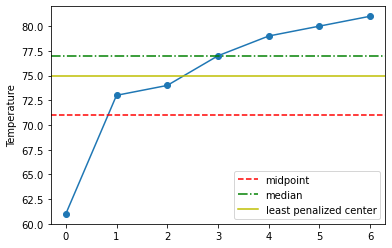

In [ ]:
least_penalized = 75
assert least_penalized == possible_centers[np.argmin(penalties)]
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='r', linestyle='--', label='midpoint')
plt.axhline(median, color='g', linestyle='-.', label='median')
plt.axhline(least_penalized, color='y', linestyle='-',label='least penalized center')
plt.legend()
plt.ylabel('Temperature')
plt.show()

* We will use the MEAN

In [ ]:
assert measurements.sum() / measurements.size == least_penalized

In [ ]:
print("measurements.size: ",measurements.size )

measurements.size:  7


In [ ]:
print("least_penalized: ",least_penalized)

least_penalized:  75


In [ ]:
print("measurements sum: ",measurements.sum())

measurements sum:  525


In [ ]:
print(measurements.sum() / measurements.size == least_penalized)

True


In [ ]:
mean = measurements.mean()
assert mean == least_penalized
assert mean == np.mean(measurements)
assert mean == np.average(measurements)
''' average can take weight as parameter as long as 
weight=1 average or mean will give the same result
We can use it when we have duplicated values
We can treat probabilities as weights ''' 

In [ ]:
equal_weights = [1] * 7
assert mean == np.average(measurements, weights=equal_weights)
unequal_weights = [100] + [1] * 6
print(mean == np.average(measurements, weights=unequal_weights))

False


In [ ]:
weighted_mean = np.average([75, 77], weights=[9, 1])
print(f"The mean is {weighted_mean}")
assert weighted_mean == np.mean(9 * [75] + [77]) == weighted_mean

The mean is 75.2


In [ ]:
assert weighted_mean == np.average([75, 77], weights=[900, 100])
assert weighted_mean == np.average([75, 77], weights=[0.9, 0.1])

The mean of the binomial is 10.00 heads


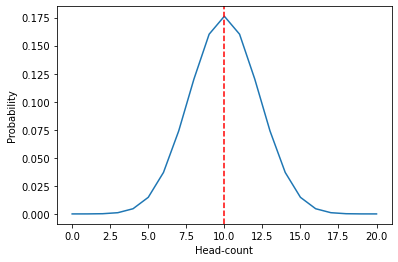

In [ ]:
num_flips = 20
interval_all_counts = range(num_flips + 1)
probabilities = stats.binom.pmf(interval_all_counts, 20, prob_head)
mean_binomial = np.average(interval_all_counts, weights=probabilities)
print(f"The mean of the binomial is {mean_binomial:.2f} heads")
plt.plot(interval_all_counts, probabilities)
plt.axvline(mean_binomial, color='r', linestyle='--')
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

* Finding the mean with scipy

In [ ]:
print(stats.binom.mean(num_flips, 0.5) == 10)

True


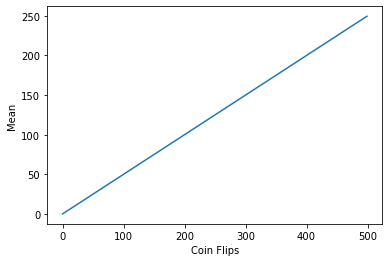

In [ ]:
means = [stats.binom.mean(num_flips, 0.5) for num_flips in range(500)]
plt.plot(range(500), means)
plt.xlabel('Coin Flips')
plt.ylabel('Mean')
plt.show()

Linear relationship (a=0.5)
Bernoulli distribution 

In [ ]:
num_flips = 16
assert stats.binom.mean(num_flips, 0.5) == 8

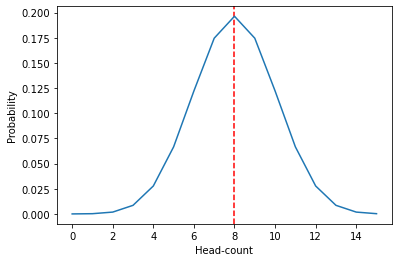

In [ ]:
num_flips = 16
assert stats.binom.mean(num_flips, 0.5) == 8
interval_all_counts = range(num_flips)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, 0.5)
plt.axvline(8, color='r', linestyle='--')
plt.plot(interval_all_counts, probabilities)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [ ]:
#smaller dispersion indicates more predictable data.

In [ ]:
california = np.array([52, 77, 96])
kentucky = np.array([71, 75, 79])
print(f"Mean California temperature is {california.mean()}")
print(f"Mean Kentucky temperature is {california.mean()}")

Mean California temperature is 75.0
Mean Kentucky temperature is 75.0


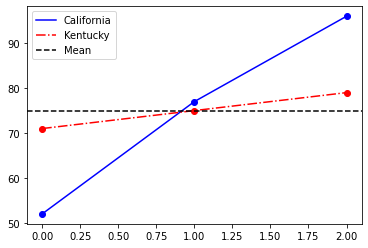

In [ ]:
plt.plot(range(3), california, color='b', label='California')
plt.scatter(range(3), california, color='b')
plt.plot(range(3), kentucky, color='r', linestyle='-.', label='Kentucky')
plt.scatter(range(3), kentucky, color='r')
plt.axhline(75, color='k', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [ ]:
def sum_of_squares(data):
    mean = np.mean(data)
    return sum(squared_distance(value, mean) for value in data)
california_sum_squares = sum_of_squares(california)
print(f"California's sum of squares is {california_sum_squares}")

California's sum of squares is 974.0


In [ ]:
def sum_of_squares(data):
    mean = np.mean(data)
    return sum(squared_distance(value, mean) for value in data)
kentucky_sum_squares = sum_of_squares(kentucky)
print(f"California's sum of squares is {kentucky_sum_squares}")

California's sum of squares is 32.0


In [ ]:
california_duplicated = np.array(california.tolist() * 2)
duplicated_sum_squares = sum_of_squares(california_duplicated)
print(f"Duplicated California sum of squares is {duplicated_sum_squares}")
assert duplicated_sum_squares == 2 * california_sum_squares

Duplicated California sum of squares is 1948.0


In [ ]:
value1 = california_sum_squares / california.size
value2 = duplicated_sum_squares / california_duplicated.size
assert value1 == value2
# To be sure that data size won't influence the result

In [ ]:
def variance(data):
    mean = np.mean(data)
    return np.mean([squared_distance(value, mean) for value in data])
assert variance(california) == california_sum_squares / california.size
assert variance(california) == variance(california_duplicated)

In [ ]:
california_variance = variance(california)
kentucky_variance = variance(kentucky)
print(f"California Variance is {california_variance:.3f}")
print(f"Kentucky Variance is {kentucky_variance:.3f}")

California Variance is 324.667
Kentucky Variance is 10.667


In [ ]:
assert california_variance == california.var()
assert california_variance == np.var(california)

 Variance:
- data_list.var() 
- np.var(data_array)


In [ ]:
def weighted_variance(data, weights):
    mean = np.average(data, weights=weights)
    squared_distances = [squared_distance(value, mean) for value in data]
    return np.average(squared_distances, weights=weights)
assert weighted_variance([75, 77], [9, 1]) == np.var(9 * [75] + [77]) 

In [ ]:
assert variance(california) == variance(california_duplicated)

In [ ]:
interval_all_counts = range(21)
probabilities = stats.binom.pmf( interval_all_counts,20, prob_head)
variance_binomial = weighted_variance(interval_all_counts, probabilities)
print(f"The variance of the Binomial is {variance_binomial:.2f} heads")

The variance of the Binomial is 5.00 heads


In [ ]:
assert stats.binom.var(20, 0.5)==5

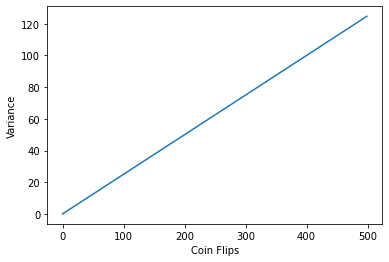

In [ ]:
variances = [stats.binom.var(num_flips, prob_head)
 for num_flips in range(500)]
plt.plot(range(500), variances)
plt.xlabel('Coin Flips')
plt.ylabel('Variance')
plt.show()

In [ ]:
assert stats.binom.var(1, 0.5) == 0.25
assert stats.binom.var(1000, 0.5) == 250

* using np.std

In [ ]:
data = [1, 2, 3]
standard_deviation = np.std(data)
assert standard_deviation ** 2 == np.var(data)